# Tasks for laboratory assignment 3

In [1]:
# imports section

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.preprocessing import PolynomialFeatures


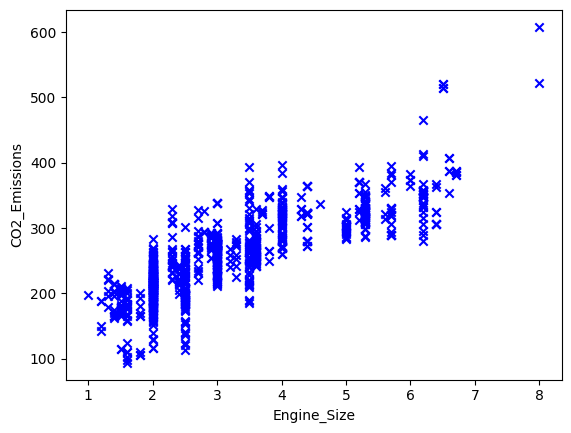

In [2]:
def build_plot(file_path, x, y):
    data = pd.read_csv(file_path)
    plt.scatter(data[x], data[y], c='blue', marker='x')
    plt.xlabel(x)
    plt.ylabel(y)
    return plt

build_plot('resources/CO2_emission.csv', 'Engine_Size', 'CO2_Emissions').show()


In [5]:
def extract_texts_from_file(file_path):
    data = pd.read_csv(file_path, sep=",")
    return data

data = extract_texts_from_file('resources/heart.csv')
print(data[:50])

    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0    63    1   3     145   233    1        0       150     0      2.3    0   
1    37    1   2     130   250    0        1       187     0      3.5    0   
2    41    0   1     130   204    0        0       172     0      1.4    2   
3    56    1   1     120   236    0        1       178     0      0.8    2   
4    57    0   0     120   354    0        1       163     1      0.6    2   
5    57    1   0     140   192    0        1       148     0      0.4    1   
6    56    0   1     140   294    0        0       153     0      1.3    1   
7    44    1   1     120   263    0        1       173     0      0.0    2   
8    52    1   2     172   199    1        1       162     0      0.5    2   
9    57    1   2     150   168    0        1       174     0      1.6    2   
10   54    1   0     140   239    0        1       160     0      1.2    2   
11   48    0   2     130   275    0        1       139     0    

## CO2 emissions

Process file `CO2_emission.csv`. Build a model, that would predict CO2 emissions from the size of the engine of car. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

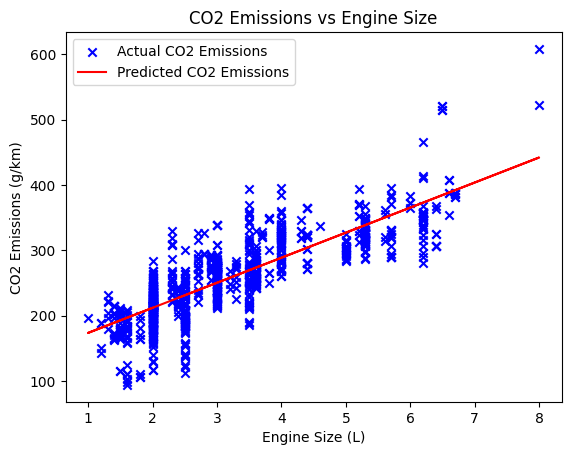

[135.3260546026322, 38.32301106042744]

In [6]:
def CO2_emissions(data):
    X = data[['Engine_Size']].values
    y = data['CO2_Emissions'].values

    model = LinearRegression()
    model.fit(X, y)

    plt.scatter(X, y, color='blue', marker='x', label='Actual CO2 Emissions')
    plt.plot(X, model.predict(X), color='red', label='Predicted CO2 Emissions')
    plt.xlabel('Engine Size (L)')
    plt.ylabel('CO2 Emissions (g/km)')
    plt.title('CO2 Emissions vs Engine Size')
    plt.legend()
    plt.show()

    return [model.intercept_, model.coef_[0]]

data = extract_texts_from_file('resources/CO2_emission.csv')
CO2_emissions(data)

## Ice Cream Sales

Process file `ice_cream_selling_data.csv`. Build a model, that would predict ice cream sales based on the temperature. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

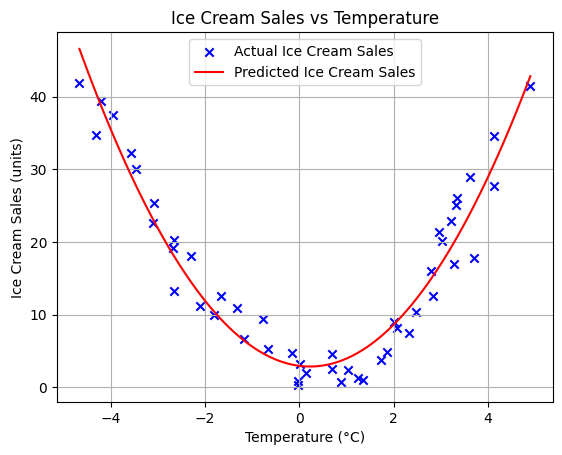

[2.9517741579934427, 0.0, -0.824681670210649, 1.8295262296702088]

In [7]:
def ice_cream_selling(data):
    X = data[['Temperature (°C)']].values
    y = data['Ice Cream Sales (units)'].values

    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()

    model.fit(X_poly, y)
    plt.scatter(X, y, color='blue', marker='x', label='Actual Ice Cream Sales')
    
    temperature_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    temperature_range_poly = poly.transform(temperature_range) 
    predicted_sales = model.predict(temperature_range_poly)

    plt.plot(temperature_range, predicted_sales, color='red', label='Predicted Ice Cream Sales')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Ice Cream Sales (units)')
    plt.title('Ice Cream Sales vs Temperature')
    plt.legend()
    plt.grid()
    plt.show()

    return [model.intercept_] + model.coef_.tolist()

data = extract_texts_from_file('resources/ice_cream_selling_data.csv')
ice_cream_selling(data)

## Electric Power Consumption

Process file `powerconsumption.csv`. Build a model, that would predict electricity consumption from the weather: temperature, humidity and wind speed. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

Mean Squared Error: 40039336.85342752
R^2 Score: 0.20705370035102633


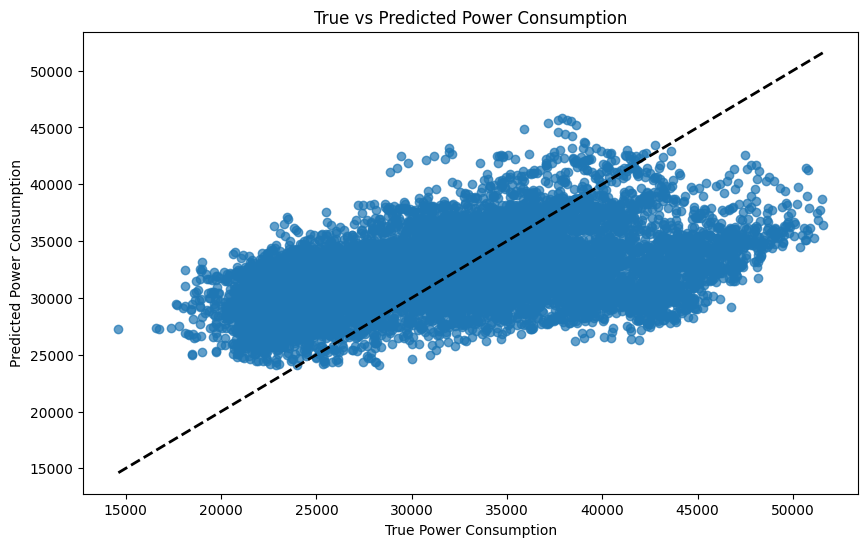

[2945.8540716364873, -726.5565012684079, -291.3824590690141]

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

def power_consumption(data):
    X = data[['Temperature', 'Humidity', 'WindSpeed']]
    y = data['PowerConsumption_Zone1']

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')

    plt.figure(figsize=(10, 6))
    plt.scatter(y_val, y_pred, alpha=0.7)
    plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
    plt.xlabel('True Power Consumption')
    plt.ylabel('Predicted Power Consumption')
    plt.title('True vs Predicted Power Consumption')
    plt.show()

    return model.coef_.tolist()

data = extract_texts_from_file('resources/powerconsumption.csv')
power_consumption(data)

## Heart Conditions Predictions

Process file `heart.csv`. It has the following data:

- age - Age of the patient
- sex - Sex of the patient
- cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
- trtbps - Resting blood pressure (in mm Hg)
- chol - Cholestoral in mg/dl fetched via BMI sensor
- fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
- restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
- thalachh - Maximum heart rate achieved
- oldpeak - Previous peak
- slp - Slope
- caa - Number of major vessels
- thall - Thalium Stress Test result ~ (0,3)
- exng - Exercise induced angina ~ 1 = Yes, 0 = No
- output - Target variable - risk of heart attack - 1 is high chance of heart attack and 0 is low chance.

Use classification model (choose model best fitting model yourself). Choose parameters that would best fit for making a prediction on. Visualize model on a plot.

*Bonus points*: split data into train data and validation data. Validate your model.

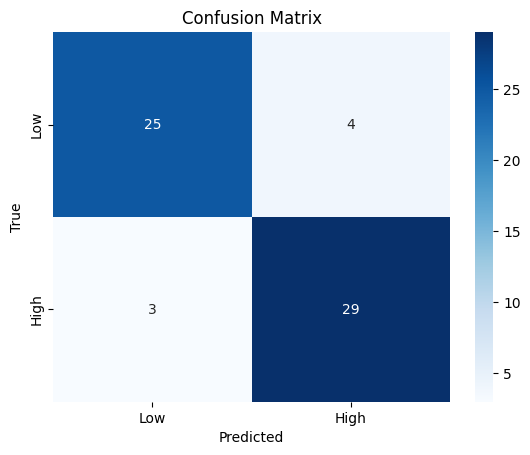

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61


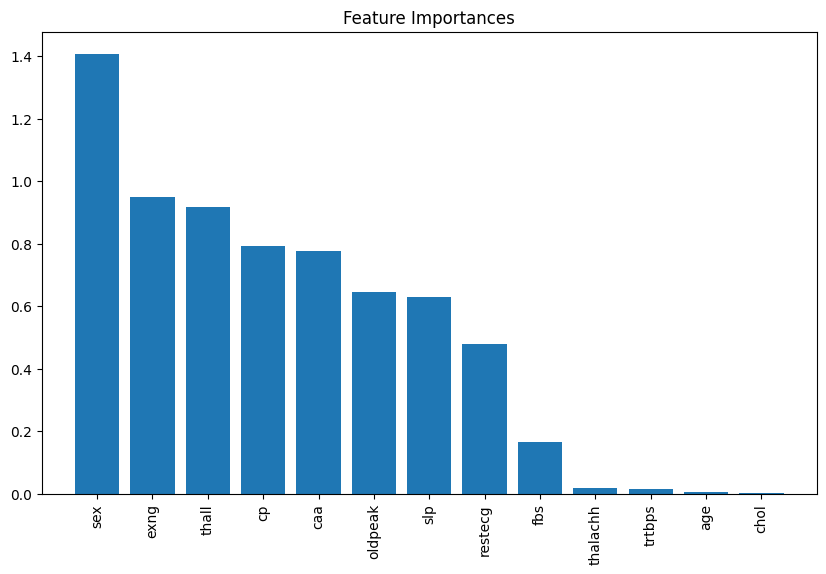

[3.0819839220594245,
 -0.007079073829115039,
 -1.4081955972092006,
 0.792680332829492,
 -0.01596689021957245,
 -0.0029243972872446708,
 0.16718629336711532,
 0.48033174986695765,
 0.018793470486571408,
 -0.9492097119756981,
 -0.6473544834575701,
 0.6296389525346984,
 -0.7765248034557568,
 -0.9170821537395815]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def heart_classification(data):
    X = data.drop(columns=['output'])
    y = data['output']

    X = pd.get_dummies(X, drop_first=True)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    report = classification_report(y_val, y_pred)
    print("Classification Report:\n", report)

    feature_importance = np.abs(model.coef_[0])
    feature_names = X.columns
    indices = np.argsort(feature_importance)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(X.shape[1]), feature_importance[indices], align="center")
    plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()

    return [model.intercept_[0]] + model.coef_[0].tolist()

data = extract_texts_from_file('resources/heart.csv')
heart_classification(data)

## Additional (extra credit)

There are more files in the `resources` folder. Take a look at the. Visualize data in these files. Choose ML algorithm for building a model and making predictions for new data. Visualize the model.